<a href="https://colab.research.google.com/github/BehrangEbrahimi13/Repo_Paper_01/blob/Algorithm-1-PMIC-based-Feature-Selection/Paper_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GitHub and GoogleDrive

In [11]:
from google.colab import drive

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# List files and directories
!ls

# Change directory
%cd '/content/drive/MyDrive/ColabNotebooks/Papers'

# List files and directories
!ls

drive  sample_data
/content/drive/MyDrive/ColabNotebooks/Papers
Paper_FeatureSelection.ipynb


In [18]:
!git clone https://github.com/BehrangEbrahimi13/Repo_Paper_01.git

Cloning into 'Repo_Paper_01'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


**Algorithm 1 PMIC-based Feature Selection**

# 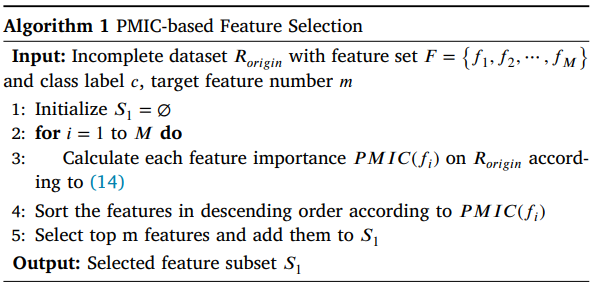


In [19]:
!pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187015 sha256=e541e350b788cd6d80692eff6eddc4f7a40bacb078039246d79cbaf95f7e2bdf
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [20]:
# Example calculate_mic

from minepy import MINE

def calculate_mic(x, y):
    mine = MINE()
    mine.compute_score(x, y)
    mic = mine.mic()
    return mic

# Example usage
x = [1, 2, 3, 4, 5]
y = [2, 4, 2, 8, 10]

mic_score = calculate_mic(x, y)
print("MIC score:", mic_score)

MIC score: 0.41997309402197447


In [22]:
import numpy as np
from minepy import MINE

def pmic_feature_selection(X, y, m):
    num_features = X.shape[1]
    pmic_scores = np.zeros(num_features)
    for i in range(num_features):
        # Select column i without null values
        feature_without_null = X[~np.isnan(X[:, i]), i]
        # print(feature_without_null)

        # Filter y based on non-null values in column i
        filtered_y = y[~np.isnan(X[:, i])]
        # print(filtered_y)

        mine = MINE()
        mine.compute_score(feature_without_null, filtered_y)
        pmic_scores[i] = mine.mic()
        # print(pmic_scores[i])
        # print("\n")
    top_m_idx = np.argsort(pmic_scores)[::-1][:m]
    return top_m_idx

np.random.seed(47)

# Generate a random 5x4 array with one-digit random values (0-9)
X = np.random.randint(0, 10, (5, 4)).astype(float)

# Generate a random 5x1 array with one-digit random values (0-9)
y = np.random.randint(0, 10, (5))

# Randomly select indices for null values
null_indices = np.random.choice(range(X.size), size=int(X.size / 2), replace=False)

# Set null values at the selected indices
X.ravel()[null_indices] = np.nan

m = 3
selected_idx = pmic_feature_selection(X, y, m)
selected_features = X[:, selected_idx]

print("X:")
print(X)

print("y:")
print(y)

print("\nSelected Features:")
print(selected_features)

X:
[[ 7.  6.  7.  8.]
 [ 8.  3. nan nan]
 [nan  7. nan nan]
 [nan  2.  2. nan]
 [nan nan  8. nan]]
y:
[2 9 1 5 0]

Selected Features:
[[ 6.  7.  7.]
 [ 3.  8. nan]
 [ 7. nan nan]
 [ 2. nan  2.]
 [nan nan  8.]]
